<a href="https://colab.research.google.com/github/sydoky/Transfer-Learning-Scaled-Up-Practice/blob/main/Transfer_Learning_Scaled_Up_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First step is preparation! 

In [1]:
#First we need a helper function
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-08-07 13:46:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-08-07 13:46:50 (56.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
#Then we have to import from helper functon
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

In [3]:
# Download data from Google Storage (already preformatted)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip 

unzip_data("101_food_classes_10_percent.zip")

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

--2022-08-07 13:46:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.128, 142.250.99.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   110MB/s    in 15s     

2022-08-07 13:47:09 (102 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [4]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/frozen_yogurt'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/club_sandwich'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/oysters'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/tiramisu'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/takoyaki'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/carrot_cake'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/ceviche'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/creme_brulee'.
There are 0 directories and 75 images in '101_food_clas

# Now I have to import all necessary library

In [5]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

In [6]:
#Creating checkpoin callback to save model for later use 
checkpoint_path = "101_classes_10_percent_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True,
                                                         monitor="val_accuracy",
                                                         save_best_only=True)

# Before we start doing the question we need to setup the input

In [7]:
#The next step is to setup our data input
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                               label_mode="categorical",
                                                                               image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


# **Now we have to build a model**

In [8]:
base_model_0= tf.keras.applications.EfficientNetB0(include_top=False)
base_model_0.trainable = False

#Now we have to setup architecture with trainable top layers
inputs = layers.Input(shape=(224,224,3), name="input_layer") 
#we don't do data augmentation because we are just practicing and we don't want to mess with large data
x = base_model_0(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="gloabl_avg_pooling_2D")(x)
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x)
model_0 = tf.keras.Model(inputs, outputs, name="model_0")


16719872/16705208 [==============================] - 0s 0us/step


# **Now we have to compile the model**

In [9]:
#Compile
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#Fit
history_of_my_model_0 = model_0.fit(train_data_all_10_percent,
                                    epochs=5,
                                    validation_data=test_data,
                                    validation_steps=int(0.15 * len(test_data)),
                                    callbacks=[checkpoint_callback])


Epoch 1/5
237/237 [==============================] - 45s 116ms/step - loss: 3.1339 - accuracy: 0.3257 - val_loss: 2.5141 - val_accuracy: 0.4481
Epoch 2/5
237/237 [==============================] - 26s 108ms/step - loss: 1.8540 - accuracy: 0.5836 - val_loss: 2.0940 - val_accuracy: 0.4905
Epoch 3/5
237/237 [==============================] - 26s 110ms/step - loss: 1.4493 - accuracy: 0.6693 - val_loss: 1.9424 - val_accuracy: 0.5074
Epoch 4/5
237/237 [==============================] - 26s 110ms/step - loss: 1.2017 - accuracy: 0.7299 - val_loss: 1.8759 - val_accuracy: 0.5106
Epoch 5/5
237/237 [==============================] - 26s 108ms/step - loss: 1.0247 - accuracy: 0.7789 - val_loss: 1.8111 - val_accuracy: 0.5230


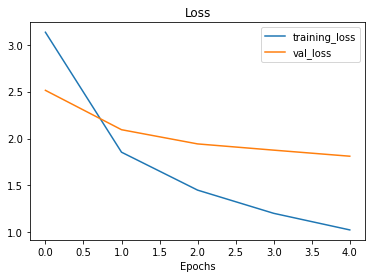

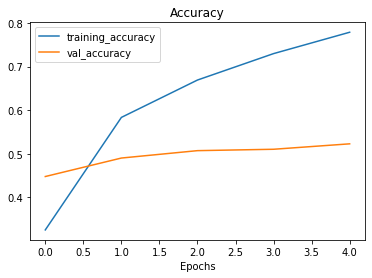

In [10]:
#Check the results
plot_loss_curves(history_of_my_model_0)

In [11]:
#Now I need to evaluate the model
model_0.evaluate(test_data)

790/790 [==============================] - 59s 74ms/step - loss: 1.5333 - accuracy: 0.6018


[1.5333309173583984, 0.6017822027206421]

# **The next step is to fine tuninig for 5 epochs**

In [12]:
#Unfreeze all the layers of the base model
base_model_0.trainable = True

#Refreeze every layer except of the last 7
for layer in base_model_0.layers[:-7]:
  layer.trainable = False

In [13]:
#Check what layers are trainable
for layer_number,layer in enumerate(base_model_0.layers):
  print(layer_number,layer.name,layer.trainable)

#False means it is not trainable

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [14]:
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=.001/10),
                metrics=["accuracy"])

In [15]:
#The next step is fitting the model
initial_epochs = 5

fine_tune_epochs = 5 + initial_epochs

history_of_my_model_0_fine_tune = model_0.fit(train_data_all_10_percent,
                                            epochs=fine_tune_epochs,
                                            validation_data=test_data,
                                            validation_steps=int(0.15 * len(test_data)),#0.15 = 15% of data
                                            initial_epoch=history_of_my_model_0.epoch[-1]) #-1 start from the last epoch
#the last line instead of callbacks because we are starting to train the model last time where it finished


Epoch 5/10
237/237 [==============================] - 35s 117ms/step - loss: 0.7540 - accuracy: 0.8189 - val_loss: 1.7917 - val_accuracy: 0.5350
Epoch 6/10
237/237 [==============================] - 27s 111ms/step - loss: 0.6062 - accuracy: 0.8574 - val_loss: 1.7980 - val_accuracy: 0.5373
Epoch 7/10
237/237 [==============================] - 27s 113ms/step - loss: 0.5049 - accuracy: 0.8869 - val_loss: 1.8393 - val_accuracy: 0.5387
Epoch 8/10
237/237 [==============================] - 27s 111ms/step - loss: 0.4227 - accuracy: 0.9093 - val_loss: 1.8335 - val_accuracy: 0.5456
Epoch 9/10
237/237 [==============================] - 27s 111ms/step - loss: 0.3499 - accuracy: 0.9304 - val_loss: 1.8953 - val_accuracy: 0.5379
Epoch 10/10
237/237 [==============================] - 27s 111ms/step - loss: 0.2880 - accuracy: 0.9489 - val_loss: 1.9085 - val_accuracy: 0.5440


# **Build a feature extraction transfer learning model for 10 epochs**

In [16]:
base_model_1 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model_1.trainable = False

#Setup model archtecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer") # shape of input image

x = base_model_1(inputs, training=False) # put the base model in inference mode so we can use it to extract features without updating the weights
x = layers.GlobalAveragePooling2D(name="global_avg_pool_2D")(x) # pool the outputs of the base model
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x) # same number of outputs as classes
feature_extractor_model = tf.keras.Model(inputs, outputs,name="feature_extractor_model")

In [17]:
#The next step is to compile and fit the model
feature_extractor_model.compile(loss="categorical_crossentropy",
                                optimizer=tf.keras.optimizers.Adam(),
                                metrics=["accuracy"])

history_extractor_model = feature_extractor_model.fit(train_data_all_10_percent,
                                                      epochs=10,
                                                      validation_data=test_data,
                                                      validation_steps=int(0.15 * len(test_data)))

Epoch 1/10
237/237 [==============================] - 33s 114ms/step - loss: 3.1419 - accuracy: 0.3271 - val_loss: 2.4810 - val_accuracy: 0.4555
Epoch 2/10
237/237 [==============================] - 26s 108ms/step - loss: 1.8533 - accuracy: 0.5886 - val_loss: 2.0703 - val_accuracy: 0.5029
Epoch 3/10
237/237 [==============================] - 26s 108ms/step - loss: 1.4446 - accuracy: 0.6686 - val_loss: 1.9171 - val_accuracy: 0.5164
Epoch 4/10
237/237 [==============================] - 26s 108ms/step - loss: 1.1997 - accuracy: 0.7307 - val_loss: 1.8295 - val_accuracy: 0.5344
Epoch 5/10
237/237 [==============================] - 26s 108ms/step - loss: 1.0219 - accuracy: 0.7783 - val_loss: 1.8321 - val_accuracy: 0.5228
Epoch 6/10
237/237 [==============================] - 26s 108ms/step - loss: 0.8826 - accuracy: 0.8201 - val_loss: 1.7682 - val_accuracy: 0.5347
Epoch 7/10
237/237 [==============================] - 26s 107ms/step - loss: 0.7706 - accuracy: 0.8487 - val_loss: 1.7484 - val_ac

In [18]:
#Now we have to do an evaluation 
feature_extractor_results = feature_extractor_model.evaluate(test_data)

790/790 [==============================] - 57s 72ms/step - loss: 1.4728 - accuracy: 0.6083


# **Now we are comparing 2 models fine turning vs feature extractor**

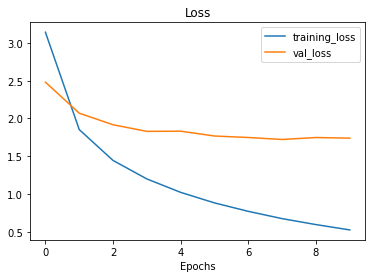

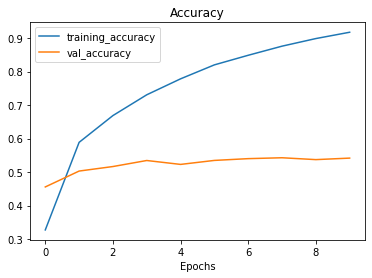

In [19]:
plot_loss_curves(history_extractor_model)

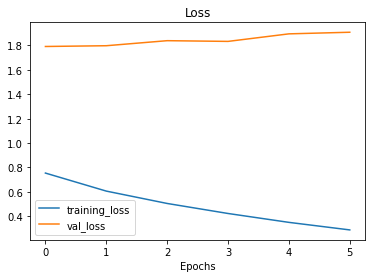

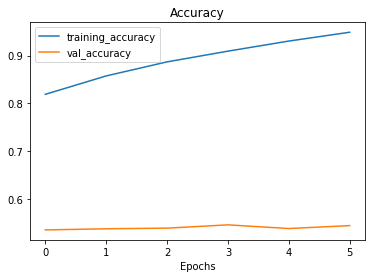

In [20]:
plot_loss_curves(history_of_my_model_0_fine_tune)

# Our feature extraction is doing great based on our results

# Question number 2
# Recreate the first model(the feature extraction model) with mixed_precision turned on. 

In [21]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16")
#In this cell we are importing mixed precision 

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


In [22]:
class_names = train_data_all_10_percent.class_names

In [23]:
from tensorflow.python.framework import dtypes
base_model_mixed_precision = tf.keras.applications.EfficientNetB0(include_top=False) #not top layers, useless
base_model_mixed_precision.trainable = False

inputs = layers.Input(shape=(224,224,3), name="input layer")

x = base_model_mixed_precision(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax",dtype=tf.float32, name="softmax_float32")(x) 
#we do outputs line to seperate activation output layers so we can output float32 activation
mixed_precision_model = tf.keras.Model(inputs, outputs)

In [24]:
mixed_precision_model.compile(loss="categorical_crossentropy",
                              optimizer=tf.keras.optimizers.Adam(),
                              metrics=["accuracy"])

history_mixed_feature_extractor = mixed_precision_model.fit(train_data_all_10_percent,
                                                            epochs=10,
                                                            validation_data=test_data,
                                                            validation_steps=int(0.15 * len(test_data)))

Epoch 1/10
237/237 [==============================] - 33s 109ms/step - loss: 3.1486 - accuracy: 0.3184 - val_loss: 2.4653 - val_accuracy: 0.4566
Epoch 2/10
237/237 [==============================] - 25s 102ms/step - loss: 1.8591 - accuracy: 0.5817 - val_loss: 2.0696 - val_accuracy: 0.5019
Epoch 3/10
237/237 [==============================] - 25s 103ms/step - loss: 1.4534 - accuracy: 0.6669 - val_loss: 1.9010 - val_accuracy: 0.5254
Epoch 4/10
237/237 [==============================] - 25s 104ms/step - loss: 1.2050 - accuracy: 0.7270 - val_loss: 1.8361 - val_accuracy: 0.5286
Epoch 5/10
237/237 [==============================] - 25s 103ms/step - loss: 1.0248 - accuracy: 0.7783 - val_loss: 1.7875 - val_accuracy: 0.5363
Epoch 6/10
237/237 [==============================] - 25s 104ms/step - loss: 0.8862 - accuracy: 0.8202 - val_loss: 1.7925 - val_accuracy: 0.5278
Epoch 7/10
237/237 [==============================] - 25s 103ms/step - loss: 0.7740 - accuracy: 0.8459 - val_loss: 1.7458 - val_ac

# **Now we have to do fine tuninng to make layers trainable**

In [25]:
base_model_mixed_precision.trainable = True

for layer in base_model_mixed_precision.layers[:-7]:
  layer.trainable = False #we only do 7 layers trainable 




In [26]:
mixed_precision_model.compile(loss="categorical_crossentropy",
                              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                              metrics=["accuracy"])

history_mixed_precision_model_fine_tune = mixed_precision_model.fit(train_data_all_10_percent,
                                                                    epochs=15,
                                                                    validation_data=test_data,
                                                                    validation_steps=int(0.15 * len(test_data)))

Epoch 1/15
237/237 [==============================] - 33s 110ms/step - loss: 0.3756 - accuracy: 0.9240 - val_loss: 1.8867 - val_accuracy: 0.5424
Epoch 2/15
237/237 [==============================] - 26s 106ms/step - loss: 0.2687 - accuracy: 0.9498 - val_loss: 1.9446 - val_accuracy: 0.5403
Epoch 3/15
237/237 [==============================] - 26s 106ms/step - loss: 0.2029 - accuracy: 0.9671 - val_loss: 2.0167 - val_accuracy: 0.5344
Epoch 4/15
237/237 [==============================] - 26s 108ms/step - loss: 0.1526 - accuracy: 0.9801 - val_loss: 2.0721 - val_accuracy: 0.5328
Epoch 5/15
237/237 [==============================] - 26s 110ms/step - loss: 0.1136 - accuracy: 0.9905 - val_loss: 2.1237 - val_accuracy: 0.5336
Epoch 6/15
237/237 [==============================] - 27s 112ms/step - loss: 0.0846 - accuracy: 0.9952 - val_loss: 2.2079 - val_accuracy: 0.5342
Epoch 7/15
237/237 [==============================] - 28s 117ms/step - loss: 0.0630 - accuracy: 0.9980 - val_loss: 2.2908 - val_ac

# **Now we need to do a question #3**
# **Take 3 of your own photos of food and use the trained model to make predictions on them**


In [27]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


In [28]:
pizza = mpimg.imread("/content/download1.jpg") 
burrito = mpimg.imread("/content/Burrito.JPG")
soup = mpimg.imread("/content/Classic-Minestrone-Soup-13720e5.jpg")

(-0.5, 258.5, 193.5, -0.5)

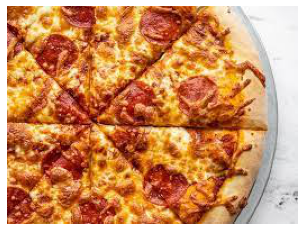

In [32]:
plt.imshow(pizza)
plt.axis(False)

(-0.5, 639.5, 359.5, -0.5)

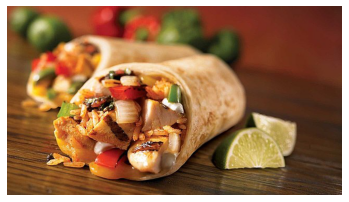

In [33]:
plt.imshow(burrito)
plt.axis(False)

(-0.5, 899.5, 835.5, -0.5)

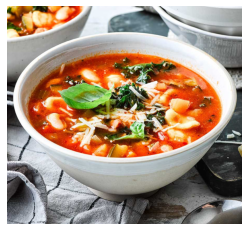

In [35]:
plt.imshow(soup)
plt.axis(False)

In [36]:
def load_and_pre_images(file_name,image_shape=224):
  img = tf.io.read_file(file_name) #io = input and output #this line is to read the image
  img = tf.image.decode_image(img,channels=3) #this line converts image into tensors 
  img = tf.image.resize(img,size=[image_shape, image_shape])  #resizing/reshaping the image into 224
  img = img/255
  return img


In [40]:
pizza = ("/content/download1.jpg") 
burrito = ("/content/Burrito.JPG")
soup = ("/content/Classic-Minestrone-Soup-13720e5.jpg")

In [45]:
def predict_and_plot(model,file_name,class_names):
  img = load_and_pre_images(file_name) # this line will return the preprocessed image
  prediction = model.predict(tf.expand_dims(img,axis=0))  #making predictions on the image
  prediction_class = class_names[int(tf.round(prediction)[0][0])] #this line will predict what is the food class is the image//Pavel fixed this line
  plt.imshow(img)
  plt.title("Prediction: {}".format(prediction_class))


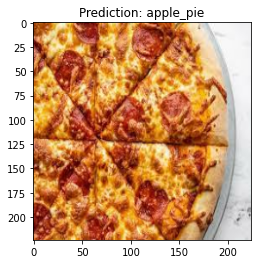

In [46]:
predict_and_plot(mixed_precision_model,pizza,class_names)